# France Road Accidents Exploratory Data Analysis

This notebook provides comprehensive exploratory data analysis of accidents using the `fct_accidents_hr` model.


## Setup


### Import

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

### Class Import

In [2]:
# Data Loader
from data_loader import DataLoader

In [10]:
# Read data from BigQuery
data_loader = DataLoader(project='biking-in-paris')

df = data_loader.load_from_bigquery(dataset='accidents', table='fct_accidents_hr')

Loading data from BigQuery: biking-in-paris.accidents.fct_accidents_hr
Filtering for vehicle types: 1 (Bicycle), 50 (E-personal transport motorized), 80 (E-bicycle)


/Users/zoe/Downloads/safe-biking-in-paris/ml_env/lib/python3.9/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Loaded 28,578 records from BigQuery


In [11]:
from severity_eda import SeverityEDA, PlotConfig

In [12]:
eda = SeverityEDA()

eda.set_data(df)

print(f"Vehicle types included: {df['vehicle_category_label'].unique()}")

Vehicle types included: ['Bicycle' 'E‑personal transport (motorized)' 'E‑bicycle']


## Analysis

In [13]:
eda.summary()


=== Severity overview ===
Fatality             |     893 cases |   3.1%
Hospitalized injury  |   5,926 cases |  20.7%
Minor injury         |  19,000 cases |  66.5%
Unharmed             |   2,741 cases |   9.6%
Unknown              |      18 cases |   0.1%
Total accidents: 28578


### Geographic: Paris, Île-de-France, Other France


=== Severity by geographic_scope ===

Other France (n=17,405)
  Fatality             |   4.7% (814)
  Hospitalized injury  |  29.8% (5,191)
  Minor injury         |  60.2% (10,484)
  Unharmed             |   5.2% (906)
  Unknown              |   0.1% (10)

Île-de-France (n=4,324)
  Fatality             |   1.4% (60)
  Hospitalized injury  |  10.6% (459)
  Minor injury         |  79.3% (3,428)
  Unharmed             |   8.6% (371)
  Unknown              |   0.1% (6)

Paris (n=6,849)
  Fatality             |   0.3% (19)
  Hospitalized injury  |   4.0% (276)
  Minor injury         |  74.3% (5,088)
  Unharmed             |  21.4% (1,464)
  Unknown              |   0.0% (2)


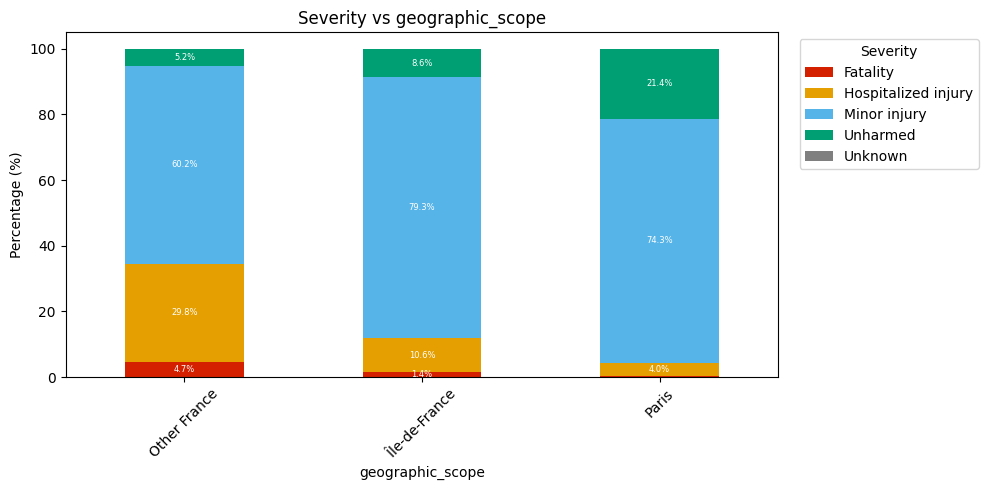

(severity_label    Fatality  Hospitalized injury  Minor injury   Unharmed  \
 geographic_scope                                                           
 Other France      4.676817            29.824763     60.235564   5.205401   
 Île-de-France     1.387604            10.615171     79.278446   8.580019   
 Paris             0.277413             4.029785     74.288217  21.375383   
 
 severity_label     Unknown  
 geographic_scope            
 Other France      0.057455  
 Île-de-France     0.138760  
 Paris             0.029201  ,
 severity_label    Fatality  Hospitalized injury  Minor injury  Unharmed  \
 geographic_scope                                                          
 Other France           814                 5191         10484       906   
 Paris                   19                  276          5088      1464   
 Île-de-France           60                  459          3428       371   
 
 severity_label    Unknown  
 geographic_scope           
 Other France         

In [14]:
eda.analyze("geographic_scope")

### Temporal & Environmental


=== Severity by time_of_day_label ===

Off‑peak (n=12,900)
  Fatality             |   3.7% (471)
  Hospitalized injury  |  23.4% (3,016)
  Minor injury         |  62.9% (8,110)
  Unharmed             |  10.0% (1,293)
  Unknown              |   0.1% (10)

Night (n=2,029)
  Fatality             |   4.0% (81)
  Hospitalized injury  |  17.8% (361)
  Minor injury         |  70.0% (1,421)
  Unharmed             |   8.1% (164)
  Unknown              |   0.1% (2)

Morning peak (n=5,690)
  Fatality             |   2.7% (154)
  Hospitalized injury  |  18.9% (1,074)
  Minor injury         |  70.9% (4,034)
  Unharmed             |   7.5% (426)
  Unknown              |   0.0% (2)

Evening peak (n=7,959)
  Fatality             |   2.3% (187)
  Hospitalized injury  |  18.5% (1,475)
  Minor injury         |  68.3% (5,435)
  Unharmed             |  10.8% (858)
  Unknown              |   0.1% (4)


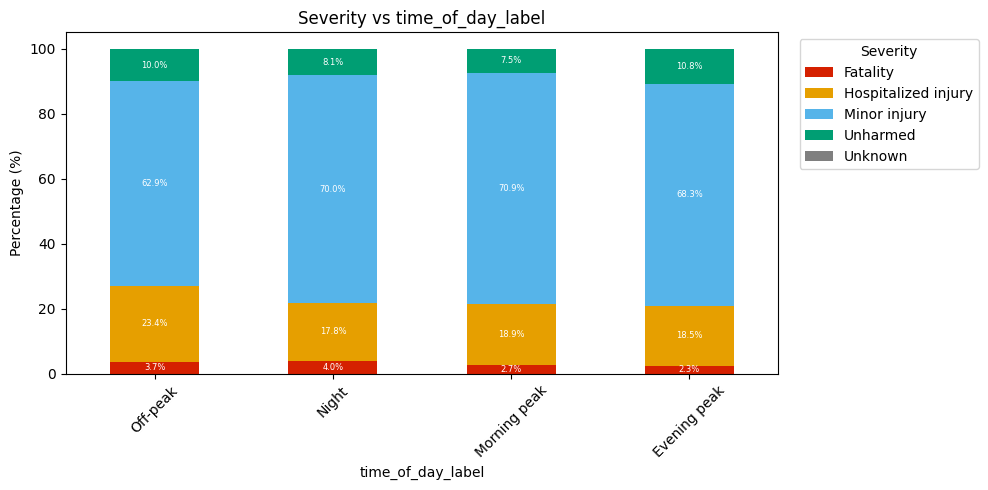


=== Severity by light_condition_label ===

Night – no lighting (n=587)
  Fatality             |  15.3% (90)
  Hospitalized injury  |  32.5% (191)
  Minor injury         |  46.5% (273)
  Unharmed             |   5.6% (33)
  Unknown              |   0.0% (0)

Twilight / dawn (n=1,664)
  Fatality             |   2.5% (41)
  Hospitalized injury  |  22.8% (380)
  Minor injury         |  66.0% (1,099)
  Unharmed             |   8.7% (144)
  Unknown              |   0.0% (0)

Full daylight (n=21,704)
  Fatality             |   3.1% (669)
  Hospitalized injury  |  21.5% (4,656)
  Minor injury         |  65.6% (14,227)
  Unharmed             |   9.8% (2,137)
  Unknown              |   0.1% (15)

Night – lighting off (n=153)
  Fatality             |   3.3% (5)
  Hospitalized injury  |  17.0% (26)
  Minor injury         |  72.5% (111)
  Unharmed             |   7.2% (11)
  Unknown              |   0.0% (0)

Night – lighting on (n=4,468)
  Fatality             |   1.9% (87)
  Hospitalized injury 

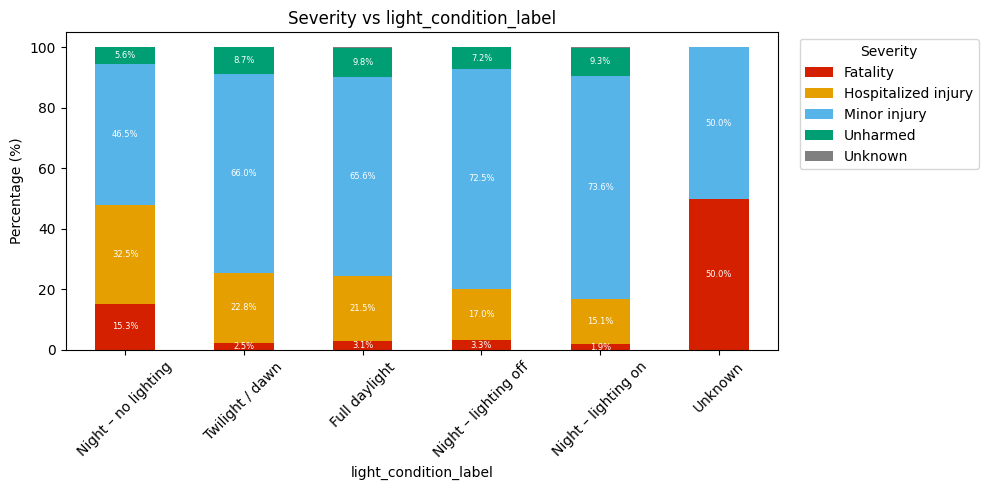


=== Severity by weather_condition_label ===

Glare (n=737)
  Fatality             |   5.3% (39)
  Hospitalized injury  |  38.8% (286)
  Minor injury         |  52.2% (385)
  Unharmed             |   3.7% (27)
  Unknown              |   0.0% (0)

Fog or smoke (n=64)
  Fatality             |   4.7% (3)
  Hospitalized injury  |  34.4% (22)
  Minor injury         |  57.8% (37)
  Unharmed             |   3.1% (2)
  Unknown              |   0.0% (0)

Strong wind / storm (n=64)
  Fatality             |   4.7% (3)
  Hospitalized injury  |  32.8% (21)
  Minor injury         |  46.9% (30)
  Unharmed             |  15.6% (10)
  Unknown              |   0.0% (0)

Other (n=69)
  Fatality             |   5.8% (4)
  Hospitalized injury  |  27.5% (19)
  Minor injury         |  63.8% (44)
  Unharmed             |   2.9% (2)
  Unknown              |   0.0% (0)

Snow or hail (n=23)
  Fatality             |   4.3% (1)
  Hospitalized injury  |  26.1% (6)
  Minor injury         |  60.9% (14)
  Unharmed    

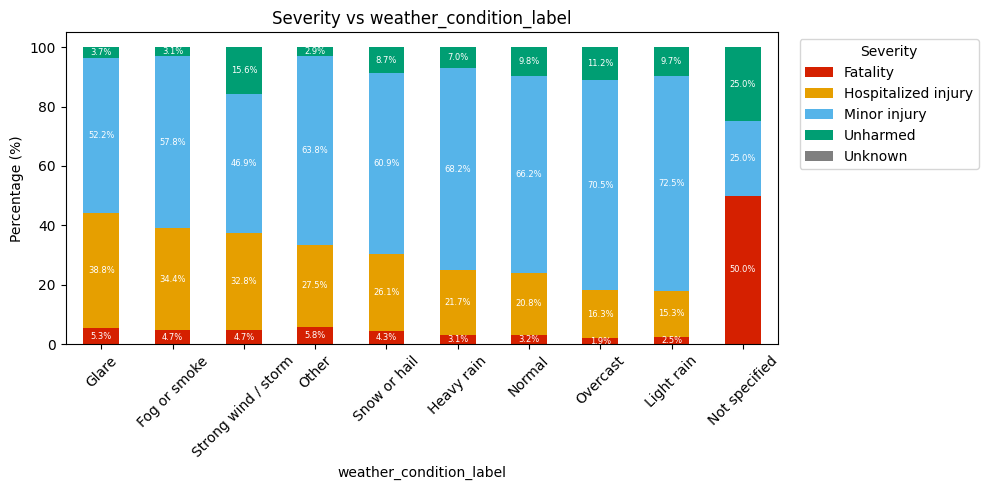


=== Severity by surface_condition_label ===

Flooded (n=1)
  Fatality             |   0.0% (0)
  Hospitalized injury  | 100.0% (1)
  Minor injury         |   0.0% (0)
  Unharmed             |   0.0% (0)
  Unknown              |   0.0% (0)

Mud (n=12)
  Fatality             |  33.3% (4)
  Hospitalized injury  |  25.0% (3)
  Minor injury         |  41.7% (5)
  Unharmed             |   0.0% (0)
  Unknown              |   0.0% (0)

Other (n=130)
  Fatality             |   9.2% (12)
  Hospitalized injury  |  36.2% (47)
  Minor injury         |  46.9% (61)
  Unharmed             |   7.7% (10)
  Unknown              |   0.0% (0)

Greasy / Oily (n=12)
  Fatality             |   8.3% (1)
  Hospitalized injury  |  25.0% (3)
  Minor injury         |  66.7% (8)
  Unharmed             |   0.0% (0)
  Unknown              |   0.0% (0)

Snow‑covered (n=6)
  Fatality             |   0.0% (0)
  Hospitalized injury  |  33.3% (2)
  Minor injury         |  33.3% (2)
  Unharmed             |  33.3% (2)
  U

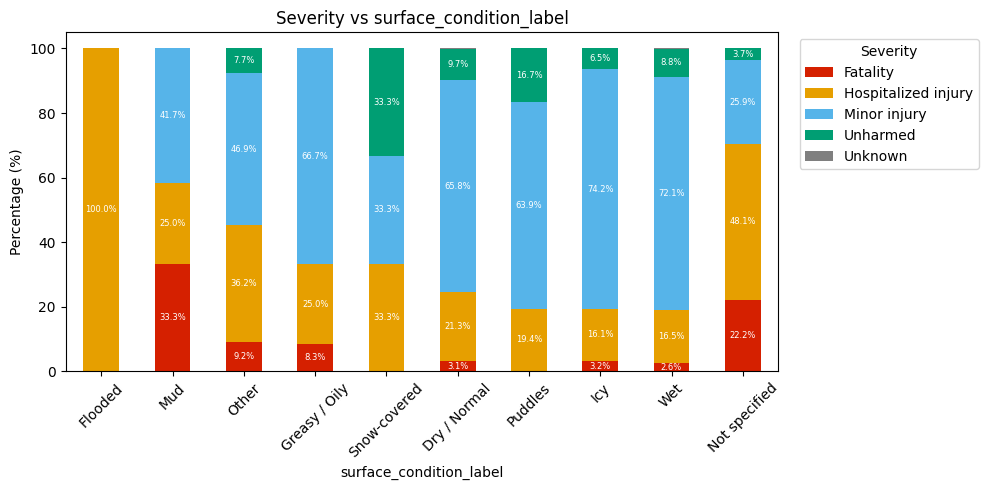

In [16]:
temporal_cols = [
    "time_of_day_label",      
    "light_condition_label",   
    "weather_condition_label", 
    "surface_condition_label"  
]

for col in temporal_cols:
    if col in df.columns:
        eda.analyze(col)
        

### Infrastructure


=== Severity by infrastructure_label ===

Slip road / ramp (n=52)
  Fatality             |  17.3% (9)
  Hospitalized injury  |  28.8% (15)
  Minor injury         |  53.8% (28)
  Unharmed             |   0.0% (0)
  Unknown              |   0.0% (0)

Level crossing (n=114)
  Fatality             |   9.6% (11)
  Hospitalized injury  |  30.7% (35)
  Minor injury         |  55.3% (63)
  Unharmed             |   4.4% (5)
  Unknown              |   0.0% (0)

Underground tunnel (n=72)
  Fatality             |   5.6% (4)
  Hospitalized injury  |  27.8% (20)
  Minor injury         |  55.6% (40)
  Unharmed             |  11.1% (8)
  Unknown              |   0.0% (0)

Modified intersection (n=2,043)
  Fatality             |   1.9% (39)
  Hospitalized injury  |  27.8% (567)
  Minor injury         |  66.8% (1,365)
  Unharmed             |   3.5% (71)
  Unknown              |   0.0% (1)

Bridge / overpass (n=339)
  Fatality             |   4.7% (16)
  Hospitalized injury  |  22.1% (75)
  Minor injur

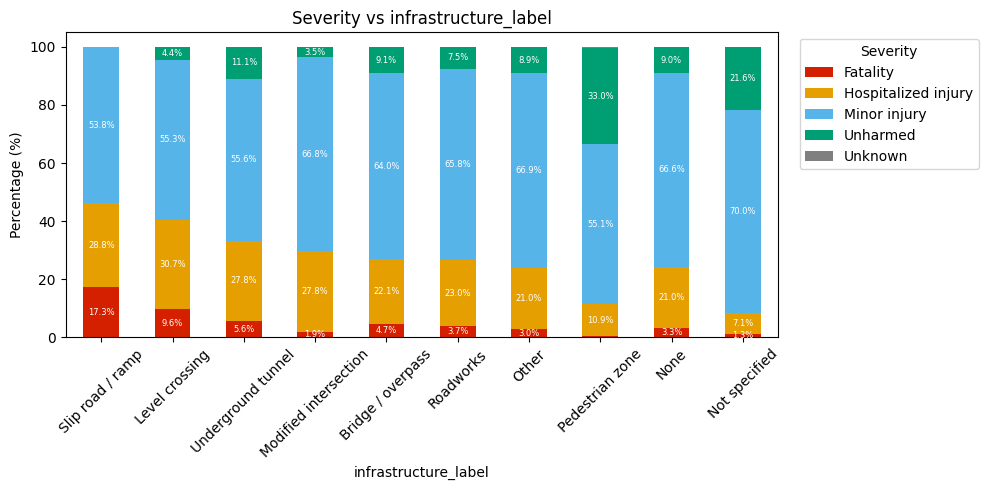


=== Severity by intersection_type_label ===

Level crossing (n=77)
  Fatality             |  11.7% (9)
  Hospitalized injury  |  33.8% (26)
  Minor injury         |  49.4% (38)
  Unharmed             |   5.2% (4)
  Unknown              |   0.0% (0)

Not at intersection (n=11,153)
  Fatality             |   5.5% (612)
  Hospitalized injury  |  24.3% (2,706)
  Minor injury         |  59.9% (6,681)
  Unharmed             |  10.3% (1,146)
  Unknown              |   0.1% (8)

Roundabout (n=2,686)
  Fatality             |   1.5% (39)
  Hospitalized injury  |  25.3% (679)
  Minor injury         |  71.4% (1,919)
  Unharmed             |   1.8% (49)
  Unknown              |   0.0% (0)

Y‑intersection (n=1,029)
  Fatality             |   3.5% (36)
  Hospitalized injury  |  22.2% (228)
  Minor injury         |  61.5% (633)
  Unharmed             |  12.8% (132)
  Unknown              |   0.0% (0)

Other (n=998)
  Fatality             |   1.8% (18)
  Hospitalized injury  |  22.8% (228)
  Minor inj

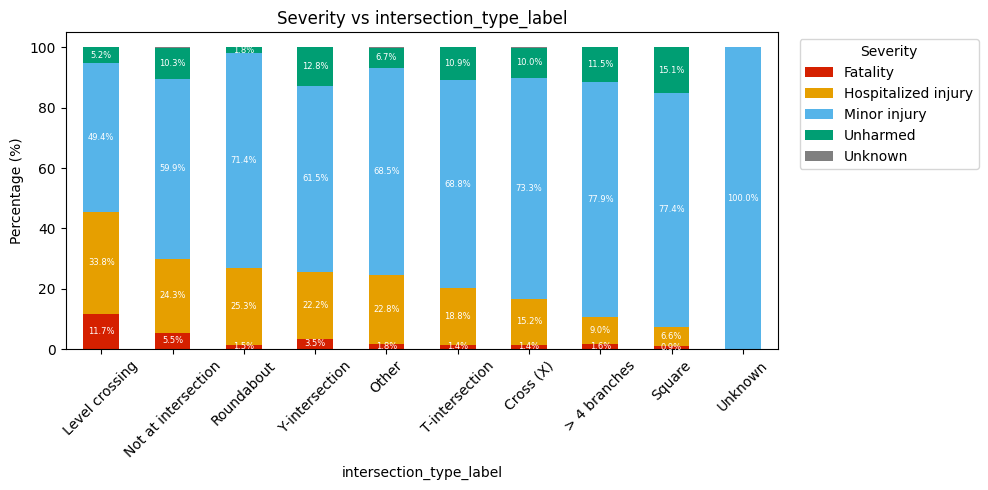


=== Severity by road_category_label ===

National road (n=377)
  Fatality             |   8.5% (32)
  Hospitalized injury  |  37.4% (141)
  Minor injury         |  50.9% (192)
  Unharmed             |   3.2% (12)
  Unknown              |   0.0% (0)

Departmental road (n=7,891)
  Fatality             |   6.5% (511)
  Hospitalized injury  |  34.5% (2,722)
  Minor injury         |  54.6% (4,305)
  Unharmed             |   4.4% (348)
  Unknown              |   0.1% (5)

Outside public network (n=23)
  Fatality             |  13.0% (3)
  Hospitalized injury  |  26.1% (6)
  Minor injury         |  56.5% (13)
  Unharmed             |   4.3% (1)
  Unknown              |   0.0% (0)

Motorway (n=28)
  Fatality             |  17.9% (5)
  Hospitalized injury  |  17.9% (5)
  Minor injury         |  60.7% (17)
  Unharmed             |   3.6% (1)
  Unknown              |   0.0% (0)

Metropolitan urban road (n=870)
  Fatality             |   4.3% (37)
  Hospitalized injury  |  28.7% (250)
  Minor inj

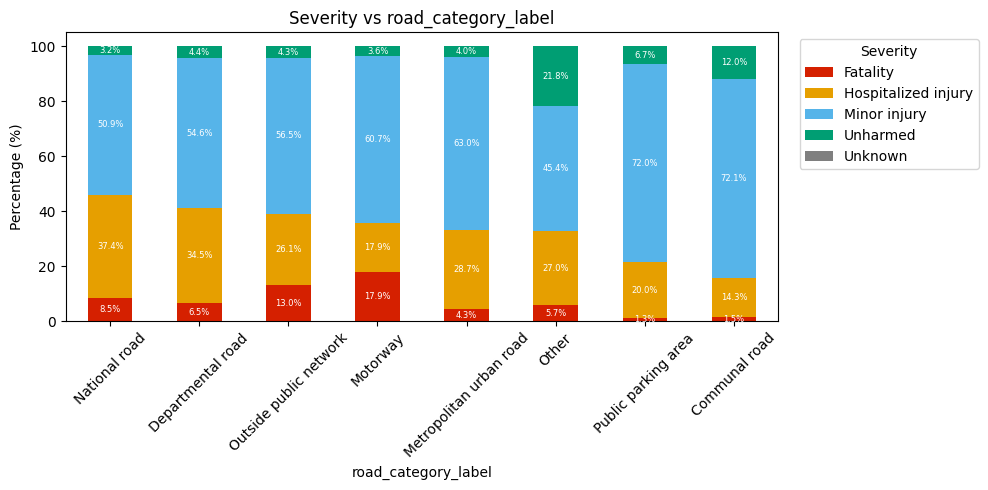


=== Severity by urban_area_label ===

Outside urban area (n=3,591)
  Fatality             |  12.7% (455)
  Hospitalized injury  |  49.3% (1,771)
  Minor injury         |  34.9% (1,253)
  Unharmed             |   3.1% (112)
  Unknown              |   0.0% (0)

Within urban area (n=24,987)
  Fatality             |   1.8% (438)
  Hospitalized injury  |  16.6% (4,155)
  Minor injury         |  71.0% (17,747)
  Unharmed             |  10.5% (2,629)
  Unknown              |   0.1% (18)


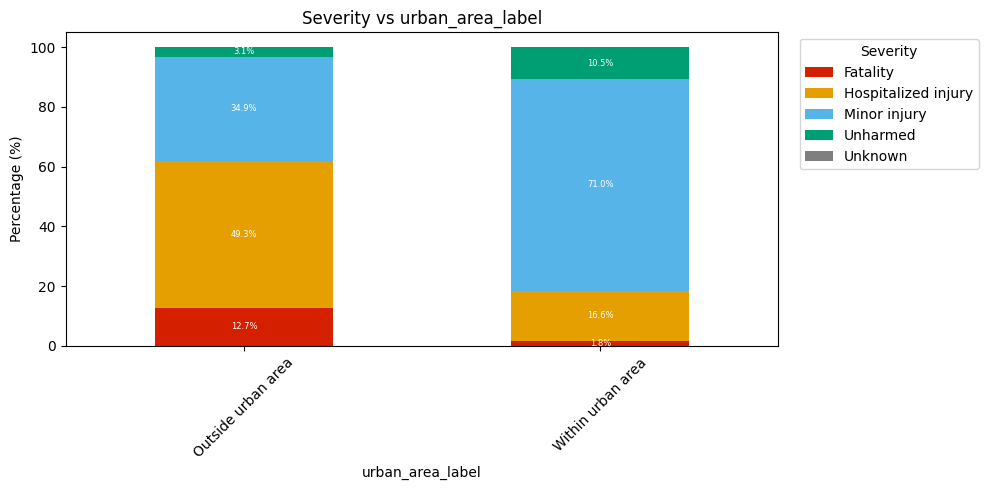

In [17]:
infrastructure_cols = [
    "infrastructure_label",    
    "intersection_type_label", 
    "road_category_label",     
    "urban_area_label"        
]

for col in infrastructure_cols:
    if col in df.columns:
        eda.analyze(col)

### Personal 


=== Severity by helmet_label ===

Wearing helmet (n=10,675)
  Fatality             |   3.7% (392)
  Hospitalized injury  |  25.0% (2,667)
  Minor injury         |  63.6% (6,784)
  Unharmed             |   7.8% (832)
  Unknown              |   0.0% (0)

No helmet (n=17,903)
  Fatality             |   2.8% (501)
  Hospitalized injury  |  18.2% (3,259)
  Minor injury         |  68.2% (12,216)
  Unharmed             |  10.7% (1,909)
  Unknown              |   0.1% (18)


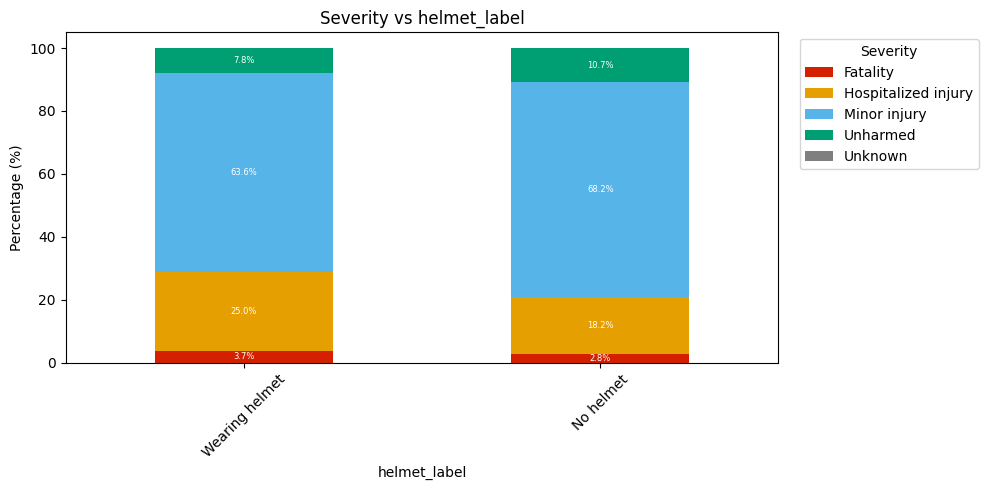


=== Severity by gender_label ===

Male (n=20,796)
  Fatality             |   3.7% (775)
  Hospitalized injury  |  22.6% (4,700)
  Minor injury         |  64.5% (13,418)
  Unharmed             |   9.2% (1,903)
  Unknown              |   0.0% (0)

Female (n=7,366)
  Fatality             |   1.6% (118)
  Hospitalized injury  |  16.6% (1,226)
  Minor injury         |  75.8% (5,582)
  Unharmed             |   6.0% (440)
  Unknown              |   0.0% (0)

Unknown (n=416)
  Fatality             |   0.0% (0)
  Hospitalized injury  |   0.0% (0)
  Minor injury         |   0.0% (0)
  Unharmed             |  95.7% (398)
  Unknown              |   4.3% (18)


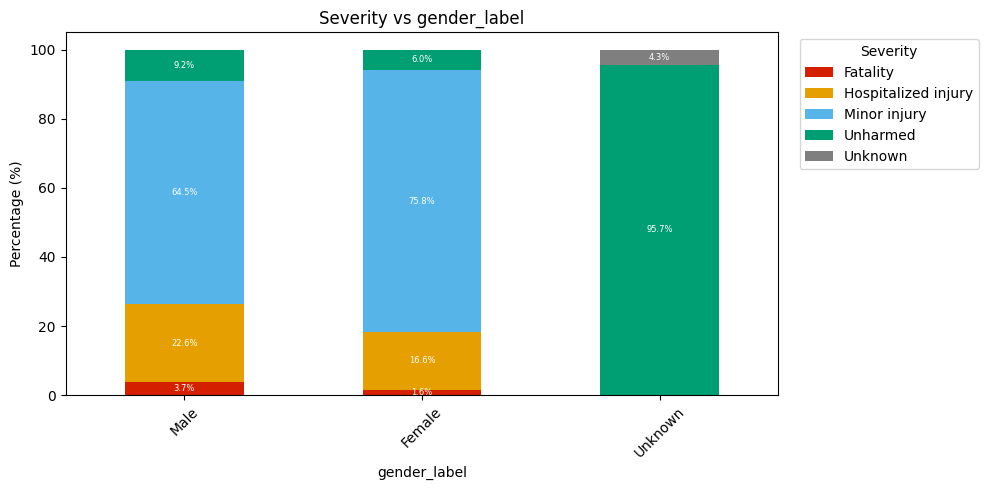


=== Severity by trip_purpose_label ===

Shopping (n=509)
  Fatality             |   7.9% (40)
  Hospitalized injury  |  33.4% (170)
  Minor injury         |  53.2% (271)
  Unharmed             |   5.5% (28)
  Unknown              |   0.0% (0)

Leisure (n=11,197)
  Fatality             |   5.5% (614)
  Hospitalized injury  |  29.8% (3,342)
  Minor injury         |  56.7% (6,353)
  Unharmed             |   7.9% (888)
  Unknown              |   0.0% (0)

Home–work (n=5,402)
  Fatality             |   1.4% (78)
  Hospitalized injury  |  15.0% (811)
  Minor injury         |  75.5% (4,077)
  Unharmed             |   8.1% (436)
  Unknown              |   0.0% (0)

Home–school (n=1,015)
  Fatality             |   1.1% (11)
  Hospitalized injury  |  13.1% (133)
  Minor injury         |  74.2% (753)
  Unharmed             |  11.6% (118)
  Unknown              |   0.0% (0)

Other (n=3,184)
  Fatality             |   0.8% (25)
  Hospitalized injury  |  10.3% (329)
  Minor injury         |  76.7% 

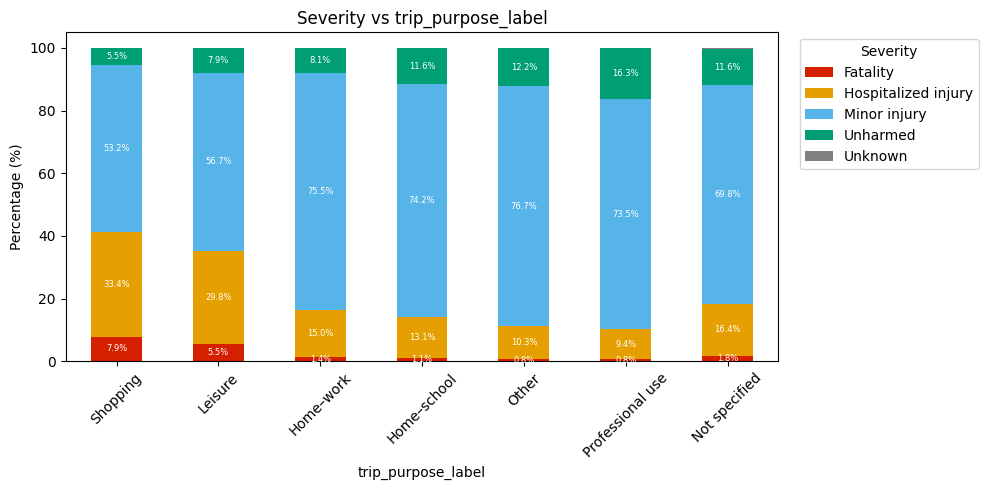


=== Severity by vehicle_category_label ===

Bicycle (n=18,594)
  Fatality             |   3.6% (669)
  Hospitalized injury  |  23.0% (4,285)
  Minor injury         |  65.0% (12,079)
  Unharmed             |   8.3% (1,550)
  Unknown              |   0.1% (11)

E‑bicycle (n=2,416)
  Fatality             |   4.6% (110)
  Hospitalized injury  |  20.8% (503)
  Minor injury         |  64.3% (1,554)
  Unharmed             |  10.3% (248)
  Unknown              |   0.0% (1)

E‑personal transport (motorized) (n=7,568)
  Fatality             |   1.5% (114)
  Hospitalized injury  |  15.0% (1,138)
  Minor injury         |  70.9% (5,367)
  Unharmed             |  12.5% (943)
  Unknown              |   0.1% (6)


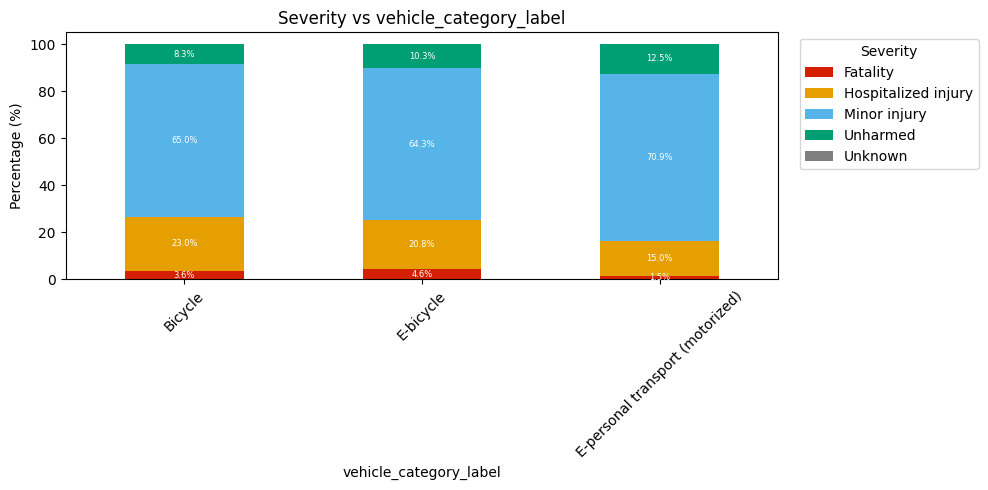

In [18]:
safety_cols = [
    "helmet_label",             
    "gender_label",           
    "trip_purpose_label",     
    "vehicle_category_label"  
]

for col in safety_cols:
    if col in df.columns:
        eda.analyze(col)